## The Plan 

 - Import Packages 
 - Get API Ref 
 - Est Connection 
 - Test Download 
 - Inspect the Download 
 - 

In [1]:
## Import Packages 

from bs4 import BeautifulSoup as bs 

### Call on the API - Alphavantage 

#### TODO
- remove key from url 
- tidy output 
- compare other APIs 

In [3]:
## API Details - get Data 

import requests
import json 
import pandas as pd 

url = 'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=AAPL&apikey=2EHSWV76OD92A71S'
r = requests.get(url)
data = json.loads(r.text)
meta = data['items']
feed = data['feed'] 

df_f = pd.DataFrame.from_dict(pd.json_normalize(feed), orient = 'columns')

# df_m = pd.DataFrame.from_dict(pd.json_normalize(meta), orient = 'columns') 

df_f.head()


,title,url,time_published,authors,summary,banner_image,source,category_within_source,source_domain,topics,overall_sentiment_score,overall_sentiment_label,ticker_sentiment
0,Tim Cook's Potential Retirement Sparks Success...,https://www.benzinga.com/news/24/05/38723115/t...,20240509T072708,[Ananya Gairola],As Apple Inc. AAPL CEO Tim Cook approaches a p...,https://cdn.benzinga.com/files/images/story/20...,Benzinga,News,www.benzinga.com,"[{'topic': 'Earnings', 'relevance_score': '0.5...",0.164681,Somewhat-Bullish,"[{'ticker': 'AAPL', 'relevance_score': '0.4950..."
1,Earnings Growth Poised to Accelerate,https://www.zacks.com/commentary/2271001/earni...,20240508T230900,[Sheraz Mian],A big part of this year's earnings growth is e...,https://staticx-tuner.zacks.com/images/article...,Zacks Commentary,n/a,www.zacks.com,"[{'topic': 'Earnings', 'relevance_score': '0.9...",0.099644,Neutral,"[{'ticker': 'NVDA', 'relevance_score': '0.1633..."
2,Earnings Growth Poised to Accelerate,https://www.zacks.com/commentary/2271017/earni...,20240508T230500,[Sheraz Mian],A big part of this year's earnings growth is e...,https://staticx-tuner.zacks.com/images/article...,Zacks Commentary,n/a,www.zacks.com,"[{'topic': 'Earnings', 'relevance_score': '0.9...",0.099644,Neutral,"[{'ticker': 'NVDA', 'relevance_score': '0.1633..."
3,"Apple's Maxed-Out New iPad Pro Costs Over $3,0...",https://www.benzinga.com/news/24/05/38718520/a...,20240508T230017,[Rounak Jain],Apple Inc. launched new iPads on Tuesday after...,https://cdn.benzinga.com/files/images/story/20...,Benzinga,News,www.benzinga.com,"[{'topic': 'Technology', 'relevance_score': '1...",0.358916,Bullish,"[{'ticker': 'AAPL', 'relevance_score': '0.0915..."
4,Navigating the Risks: Why Investors Should Be ...,https://moneymorning.com/2024/05/08/fast-profi...,20240508T205544,[Chris Johnson],Fast Profits: Investors Should Be Cautious wit...,https://moneymorning.com/wp-content/blogs.dir/...,Money Morning,RSS,moneymorning.com,"[{'topic': 'Retail & Wholesale', 'relevance_sc...",-0.043810,Neutral,"[{'ticker': 'BBY', 'relevance_score': '0.47546..."


### Create a 'WordCloud' from the article summaries 

Can be put into a function in a visualisation class if required 

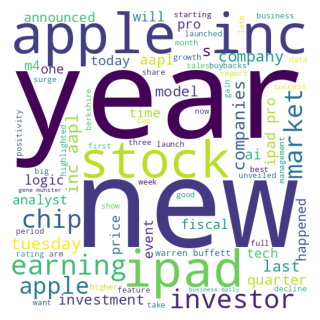

In [5]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

comment_words = ' '

stopwords = set(STOPWORDS)

bow = df_f.summary.str.cat()
tokens = bow.split()

for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

comment_words += " ".join(tokens)+ " "

word_cloud = WordCloud(width = 500,
                       height = 500,
                       background_color = "white",
                       min_font_size = 10,
                       stopwords = stopwords).generate(comment_words)

plt.figure(figsize=(3,3))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad = 0)



In [6]:



url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=demo'
r = requests.get(url)
data = json.loads(r.text)

for k in data:
    print(k)

data_t = data['Time Series (Daily)']

print(data_t)

#df = pd.DataFrame.from_dict(pd.json_normalize(data_t), orient = 'index')

df = pd.DataFrame.from_dict({(i): data_t[i] 
                           for i in data_t.keys()},
                       orient='index')

## Tidy the column names 
df = df.rename({"1. open": "Open" , "2. high" : "High", "3. low": "Low", "4. close": "Close", "5. volume": "Volume"}, axis = "columns")
df = df.astype(float)
## Tidy the index type 
df.index = pd.DatetimeIndex(df.index)

df.head()
df.dtypes

Meta Data
Time Series (Daily)
{'2024-05-08': {'1. open': '168.0100', '2. high': '170.2600', '3. low': '167.9000', '4. close': '169.9000', '5. volume': '3522011'}, '2024-05-07': {'1. open': '169.0000', '2. high': '169.2900', '3. low': '167.9400', '4. close': '168.3800', '5. volume': '3155260'}, '2024-05-06': {'1. open': '166.5000', '2. high': '168.6700', '3. low': '166.3800', '4. close': '168.6100', '5. volume': '4222266'}, '2024-05-03': {'1. open': '165.0000', '2. high': '166.6100', '3. low': '164.9200', '4. close': '165.7100', '5. volume': '3400405'}, '2024-05-02': {'1. open': '164.3500', '2. high': '164.8800', '3. low': '162.6200', '4. close': '164.6900', '5. volume': '3829853'}, '2024-05-01': {'1. open': '165.6900', '2. high': '166.2700', '3. low': '164.3000', '4. close': '164.4300', '5. volume': '4030960'}, '2024-04-30': {'1. open': '166.4900', '2. high': '166.7600', '3. low': '165.2605', '4. close': '166.2000', '5. volume': '6011634'}, '2024-04-29': {'1. open': '167.4000', '2. hig

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

### Graph the output for market data 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


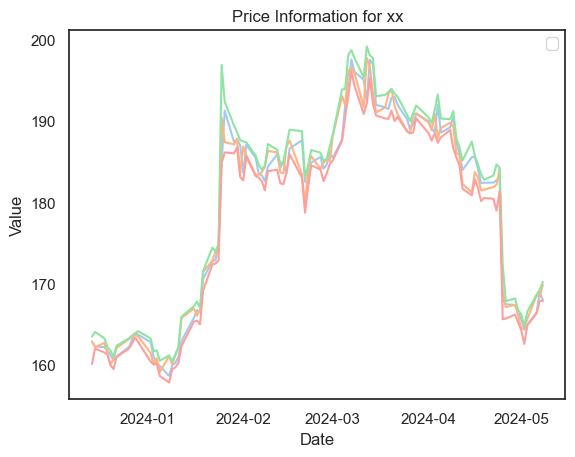

In [8]:
import seaborn as sns 

sns.set_theme(style = 'white', palette = 'pastel')

## set figure size for publishing 

plt.plot(df['Open'])
plt.plot(df['Close'])
plt.plot(df['High'])
plt.plot(df['Low'])
plt.legend()

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Price Information for xx')

plt.show()
 
# Adding labels and title 
